In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/Gaurav Singh/Desktop/python/Assignment no 4/mall_kmeans.csv')

In [4]:
df.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.drop(['Genre','Spending Score (1-100)'],axis=1)

,CustomerID,Age,Annual Income (k$)
0,1,19,15
1,2,21,15
2,3,20,16
3,4,23,16
4,5,31,17
...,...,...,...
195,196,35,120
196,197,45,126
197,198,32,126
198,199,32,137


Text(0, 0.5, 'Income $')

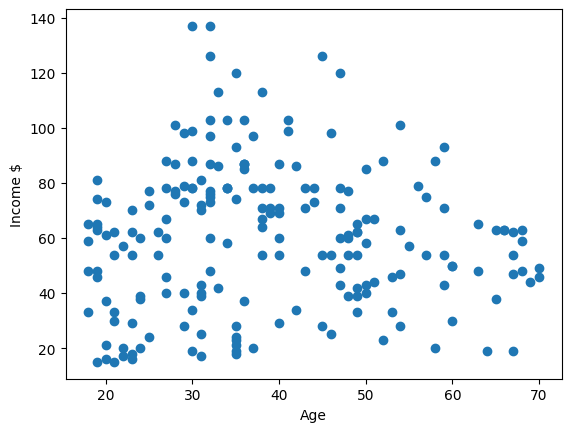

In [6]:
plt.scatter(df.Age,df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Income $')

In [7]:
from sklearn.cluster import KMeans

In [8]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Annual Income (k$)']])
y_predicted

C:\Users\Gaurav Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
df['clusters']=y_predicted
df.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0


In [10]:
km.cluster_centers_

array([[28.36      , 31.44      ],
       [34.34782609, 82.82608696],
       [55.03448276, 50.34482759]])

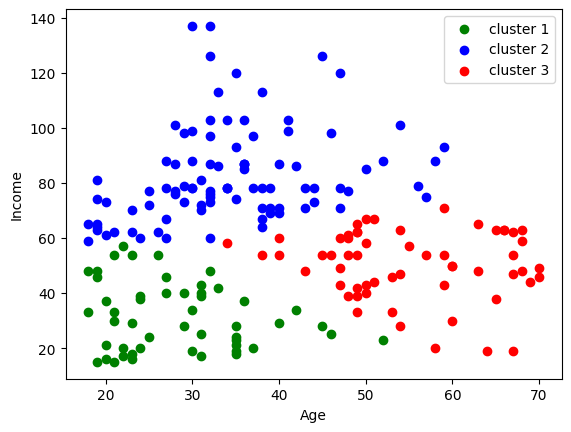

In [12]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='g')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='b')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='r')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['cluster 1','cluster 2','cluster 3'],loc=0)

Preprocessing using min max scatter

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(df[['Age']])
df[['Annual Income (k$)']]=scaler.transform(df[['Age']])

In [14]:
df.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,0.019231,39,0
1,2,Male,21,0.057692,81,0
2,3,Female,20,0.038462,6,0
3,4,Female,23,0.096154,77,0


In [17]:
y_predicted=km.fit_predict(df[['Age','Annual Income (k$)']])
df['clusters']=y_predicted
df.head(4)

C:\Users\Gaurav Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,0.019231,39,1
1,2,Male,21,0.057692,81,1
2,3,Female,20,0.038462,6,1
3,4,Female,23,0.096154,77,1


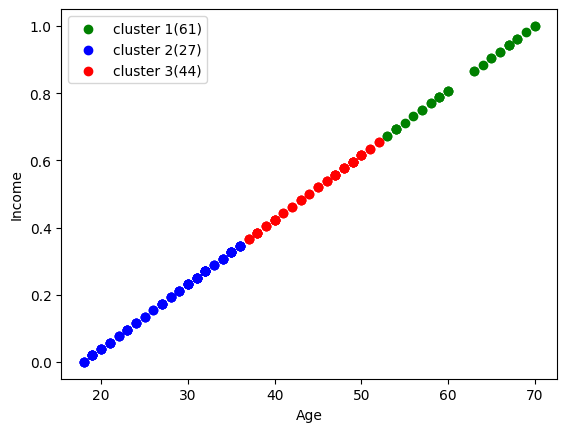

In [30]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='g')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='b')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='r')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['cluster 1(61)','cluster 2(27)','cluster 3(44)'],loc=0)

In [29]:
a=b=c=0
p=q=r=0
for i in df.index:
        if df['clusters'][i]==0:
            a+=df['Age'][i];
            p+=1;
        elif df['clusters'][i]==1:
            b+=df['Age'][i];
            q+=1;
        elif df['clusters'][i]==2:
            c+=df['Age'][i];
            r+=1;
print(a/p," ",b/q," ",c/r)

61.44444444444444   27.740384615384617   44.55
